# <center> **<u>Scikit-Learn: Supervised Learning</u>**  </center>
<br><br>
<figure style="text-align: center;">
    <img src="notebook_images/scikit-learn_supervised_learning/supervised_learning.jpg" alt="Supervised Learning">
</figure>

---

- **Supervised Learning** represents the rigorous mathematical process of mapping input data (features) to output data (labels) through the optimization of a function that minimizes prediction error.
- All that jargon-nonsensical means essentially is that *supervised learning* is a machine learning approach where a model is trained using a labeled dataset, meaning each input is paired with the correct output. The algorithm identifies patterns between these inputs and labels to make accurate predictions or classifications on new, unseen data.

#### All Imports

In [15]:
# these will NOT be imported in exercises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn imports (imported in exercises)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# **1. Classification**

---

# **2. Regression**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [11]:
sales_adver_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/advertising_and_sales_clean.csv')
sales_adver_df.drop('influencer', axis=1, inplace=True)

## Regression Feature Creation

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

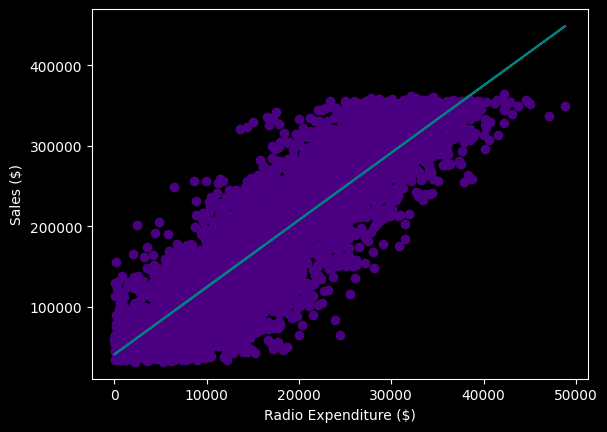

In [7]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression

# assign `radio` column's values: X
X = sales_adver_df['radio'].values
# assign `sales` column values: y
y =sales_adver_df['sales'].values

# reshape X
X = X.reshape(-1, 1)


# instantiate LinearRegression model: linr
linr = LinearRegression()
# fit model `linr` to the data
linr.fit(X, y)
# make predictions: preds
preds = linr.predict(X)


# create scatterplot of `X` and `y` with `color='indigo'`
plt.scatter(X, y, color='indigo')

# create lineplot with `X` and `preds` with `color='teal'`, and include x and y labels
plt.plot(X, preds, color='teal')
plt.xlabel('Radio Expenditure ($)')
plt.ylabel('Sales ($)')

# show plot
plt.show()

## Linear Regression

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [22]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=69)


# instantiate LinearRegression model: lreg
lreg = LinearRegression()
# fit model
lreg.fit(X_train, y_train)
# make predictions: y_pred
y_pred = lreg.predict(X_test)

# print predictions and actual values
print('Predictions: {}; Actual: {}'.format(y_pred[:2], y_test[:2]))


# compute R-Squared: r_sq
r_sq = lreg.score(X_test, y_test)
# compute RMSE: rmse
rmse = root_mean_squared_error(y_test, y_pred)

# print metrics
print('R^2: {}'.format(r_sq))
print('RMSE: {}'.format(rmse))

Predictions: [227836.78136956 106709.77106839]; Actual: [226508.12 106471.53]
R^2: 0.9989613048989213
RMSE: 3031.704428862677


## K-Fold Validation

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [23]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values


# create KFold object with `n_splits=7`: kf
kf = KFold(n_splits=7, shuffle=True, random_state=33)
# instantiate LinearRegression: lr_kf
lr_kf = LinearRegression()

# compute 7-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr_kf, X, y, cv=kf)

# print `cv_scores`
print(cv_scores)
# print `cv_scores`mean
print(f'Mean: {np.mean(cv_scores)}')
# print `cv_scores` standard deviation
print(f'Standard Deviation: {np.std(cv_scores)}')
# print `cv_scores` 95% confidence interval
print(f'95% CI: {np.quantile(cv_scores, [0.25, 0.975])}')

[0.99899013 0.99899363 0.99898552 0.99895264 0.99899417 0.99896127
 0.99906399]
Mean: 0.9989916217042066
Standard Deviation: 3.322681829782428e-05
95% CI: [0.9989734  0.99905352]


## Ridge

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [25]:
# scikit-learn imports here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=333)

# define lists: alphas; ridge_scores
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

# loop through alphas, instantiating Ridge with each alpha: ridge
for alpha in alphas:
    ridge = Ridge(alpha)
    #fit model
    ridge.fit(X_train, y_train)

    # calculate R^2: r2_score
    r2_score = ridge.score(X_test, y_test)
    # append `r2_score` to `ridge_scores`
    ridge_scores.append(r2_score)

# print `ridge_scores`
print(ridge_scores)

[0.9989686539164704, 0.998968653916472, 0.9989686539164888, 0.9989686539166561, 0.9989686539183297, 0.9989686539350652]


## Lasso

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

[ 3.56051482e+00 -8.16805954e-04  6.73399304e-03]


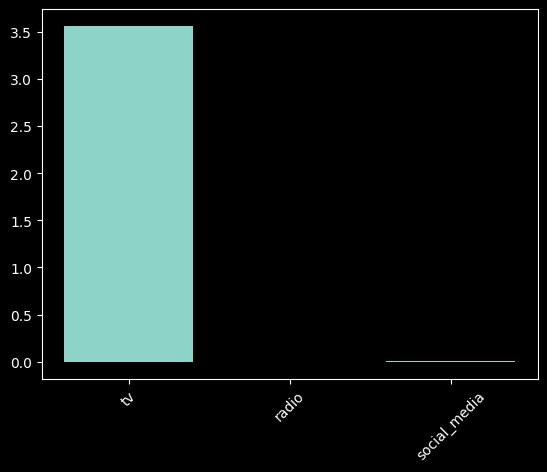

In [32]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


# instantiate Lasso with `alpha=0.42`: lasso
lasso = Lasso(alpha=0.42)
# fit model
lasso.fit(X_train, y_train)


# compute and print lasso coefficients: lasso_coef
lasso_coef = lasso.coef_
print(lasso_coef)

# define list of columns: sales_cols
sales_cols = list(sales_adver_df.drop('sales', axis=1))
#create barplot from `sales_col` and `lasso_coef` with `.xticks(rotation=45)` and show plot
plt.bar(sales_cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# **3. Fine-Tuning**

---

## Prediction Classifiers

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [35]:
diab_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/diabetes_clean.csv')

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [38]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=777)


# instantiate KNeighborsClassifier with `n_neighbors=8`: knn_cm
knn = KNeighborsClassifier(n_neighbors=8)
# fit model
knn.fit(X_train, y_train)
# make predications: y_pred_cm
y_pred = knn.predict(X_test)


# print confusion matrix and classificatin report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[125  14]
 [ 31  30]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       139
           1       0.68      0.49      0.57        61

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.76      0.78      0.76       200



## Logistic Regression

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

[0.343772   0.23372998 0.93677428 0.3190574  0.25416713 0.26545981
 0.32794897 0.1942066  0.12349005 0.69840745]


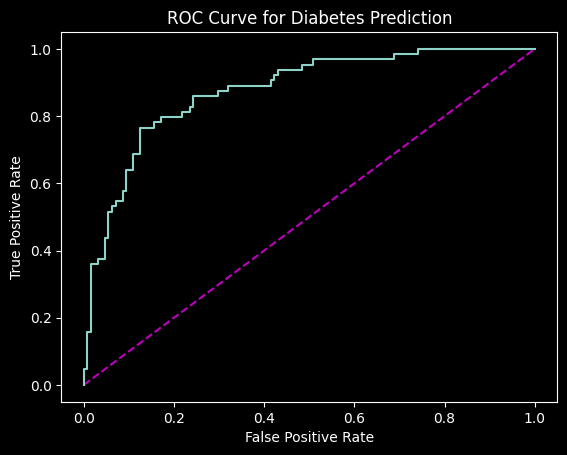

0.875732421875
[[116  12]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       128
           1       0.77      0.64      0.70        64

    accuracy                           0.82       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.81      0.82      0.81       192



In [52]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

# instantiate LogisticRegression with `max_iter=333`: logr
logr = LogisticRegression(max_iter=333)
# fit model
logr.fit(X_train, y_train)
# make predictions: y_pred
y_pred = logr.predict(X_test)
# predict probabilities: y_pred_probs
y_pred_probs = logr.predict_proba(X_test)[:, 1]

# print `y_pred_probs[:10]`
print(y_pred_probs[:10])


# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# plot comparison line with `m--` (magenta dashed line)
plt.plot([0, 1], [0, 1], 'm--')
# plot fpr v, tpr with `x.label()`, `y.label()`, and `title()` and show plot
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# print ROC accuracy score, confusion matrix, and classification report
print(roc_auc_score(y_test, y_pred_probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning

### GridSearchCV

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [74]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, GridSearchCV

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# instantiate KFold with `n_splits=9`: kf
kf = KFold(n_splits=5, shuffle=True, random_state=3)
# set up parameter grid for `alpha`: param_grid
param_grid = {'alpha': np.linspace(.00001, 1, 42)}
# instantiate Lasso: lasso
lasso = Lasso()
# instantiate GridSearchCV with `lasso`, `param_grid`, and `cv=kf`: lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
# fit model
lasso_cv.fit(X_train, y_train)

# print best parameters and best score
print(f'Tuned Lasso Parameters: {lasso_cv.best_params_}')
print(f'Tuned Lasso Score: {lasso_cv.best_score_}')

Tuned Lasso Parameters: {'alpha': np.float64(1e-05)}
Tuned Lasso Score: 0.2816155042461044


# RandomizedSearchCV

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [80]:
# scikit-learn imports here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,  RandomizedSearchCV

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# instantiate KFold with `n_splits=9`: kf
kf = KFold(n_splits=5, shuffle=True, random_state=3)
# create parameter space: params
params = {'l1_ratio': [1],
          'tol': np.linspace(0.001, 1.0, 69),
          'C': np.linspace(0.01, 1.0, 69),
          'class_weight': ['balanced', {0: 0.8, 1: 0.2}],
          'max_iter': [333],
        'solver': ['liblinear']}

# instantiate LogisticRegression: logreg
logreg = LogisticRegression()
# instantiate RandomizedSearchCV with `logreg`, `params`, and `cv=kf`: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
# fit model
logreg_cv.fit(X_train, y_train)


# # print best parameters and best score
print(f'Tuned Lasso Parameters: {logreg_cv.best_params_}')
print(f'Tuned Lasso Score: {logreg_cv.best_score_}')

Tuned Lasso Parameters: {'tol': np.float64(0.10383823529411765), 'solver': 'liblinear', 'max_iter': 333, 'l1_ratio': 1, 'class_weight': 'balanced', 'C': np.float64(0.8107352941176471)}
Tuned Lasso Score: 0.7673163418290855


# **4. Preprocessing and Pipelines**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [2]:
music_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/music_clean.csv')
genres = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/genres.csv')
music_df['genre'] = genres
music_df = music_df.iloc[:, 1:]

## Creating Dummy Variables

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [146]:
# scikit-learn imports used here
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

# create `music_df` with dummy values: music_df_dum, and print shape
music_df_dum = pd.get_dummies(music_df, drop_first=True)
print(f'`music_df_dum` is shaped:  {music_df_dum.shape}')

# create variables: X, y
X = music_df_dum.drop('popularity', axis=1).values
y = music_df_dum['popularity'].values


# instantiate KFold with `n_splits=7`: kf
kf = KFold(n_splits=7, shuffle=True, random_state=789)
# instantiate Ridge with `alpha=0.222`: ridge
ridge = Ridge(alpha=0.222)


# perform cross-validation: scores
scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
# calculate RMSE, converting scores to positives: rmse
rmse = np.sqrt(-scores)

# print average RMSE and standard deviation of target array
print(f'Average RMSE:  {np.mean(rmse)}')
print(f'Standard Deviation of Target Array:  {np.std(y)}')

`music_df_dum` is shaped:  (1000, 20)
Average RMSE:  12.577161686498476
Standard Deviation of Target Array:  14.02156909907019


## Handling Missing Data

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [2]:
dirty_music_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/music_UNCLEAN.csv')

In [8]:
# print the numer of rows in each column of `dirty_music_df` that contain `NA` values
print(dirty_music_df.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
instrumentalness     91
duration_ms          91
danceability        143
valence             143
energy              200
acousticness        200
dtype: int64


### <u>Technique</u>: Dropping `NA` Values (i.e. missing data)

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- drop `NA` values from columns where $\sum NA_{column} < 50$ (i.e. where the sum of the `NA` values in the particular column is less than `50`---or `5%` of the total rows)

In [3]:
# drop `NA` values from columns with less than `50`
dirty_music_df = dirty_music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])

### <u>Technique</u>: Creating Binary Features from Categorical Features

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- uses `dirty_music_df` from previous exercise
- convert `dirty_music_df['genre']` to a binary feature, where "Rock" is `1` and all other genres are `0`
    - *the point of this is because we are going to build a model that will try to identify whether a song is a `"Rock"` song or not*

In [4]:
#convert `genre` column into binary feature
dirty_music_df['genre'] = np.where(dirty_music_df['genre']== 'Rock', 1, 0)

In [9]:
# print the `.sum()` of `NA` values of the columns again to see the progress made
print(dirty_music_df.isna().sum().sort_values())
# print unique values of `dirty_music_df['genre']`
print(f'Unique genre values: {dirty_music_df['genre'].unique()}')

popularity            0
loudness              0
liveness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
energy              178
acousticness        178
dtype: int64
Unique genre values: [0 1]


### <u>Technique</u>: Imputing Values
- **Imputation** is using *subject-matter expertise* to replace missing data with educated guesses (or *near-fits*---this is my own term, not an official or recognized term)
- For quantitative columns, common methodologie used are either the *mean* or *median* of the column or of a category to which groups of the column's rows belong (which ever makes most sense for the dataset being used)
    - For example, if you have a column that is full labeling each individual represented in the dataset as being within one of four income levels, "poverty", "low", "middle", or "upper", and another column has a scaled credit score for each individual that is missing values, it seems a good practice to take the *mean* credit score for the four groups and fill in the `NA` values with a credit score that is common to the income level of the average individual in that group
- For categorical columns, the *mode* is commonly to used
- Before this can take place, however, the dataset must be split into training and test sets to prevent *data leakage*

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- uses `dirty_music_df` from previous exercises

In [6]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# define variables: X, y
X = dirty_music_df.drop('genre', axis=1).values
y = dirty_music_df['genre'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=387)

# instantiate SimpleImputer: imputer
imputer = SimpleImputer()

# instantiate KNeighborsClassifier with `n_neighbors=6`: knn
knn = KNeighborsClassifier(n_neighbors=6)

# build pipeline steps list: p_steps
p_steps = [('imputer', imputer),('knn', knn)]

# instantiate Pipeline with `steps=p_steps`: pipeline
pipeline = Pipeline(steps=p_steps)

# fit pipeline
pipeline.fit(X_train, y_train)

# make predictions: y_pred
y_pred = pipeline.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[85 63]
 [77 61]]


### <u>Technique</u>: Centering and Scaling
- Why scale data?
    - many models use some form of distance between variable values to inform them
    - features on larger scales can disproportionately influence the model
- What are some methods for scaling data?
    - **Standardization**: centers data around a mean of `0` with a standard deviation of `1`(less sensitive to outliers)
        - $ \dfrac{x_{feature} - \mu_{feature}}{\sigma_{feature}} $ where $x_{feature}$ is the feature, $\mu_{feature}$ is the mean of the feature, and $\sigma_{feature}$ is the standard deviation of the feature
    - **Normalization**: scales data to a fixed ranged (more sensitive to outliers)
        - **<u>Min-Max Scaling</u>**: $\dfrac{x_{feature} - min_{feature}}{max_{feature} - min_{feature}}$
        - **<u>Decimal Scaling</u>**: $\dfrac{x_{feature}}{10^{n}}$ where $n$ is the number of decimal places
        - **<u>Log Scaling</u>**: $log(feature)$

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- uses `dirty_music_df` from previous exercises

In [12]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


# define variables: X, y
X = dirty_music_df.drop('loudness', axis=1).values
y = dirty_music_df['loudness'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=787)


# instantiate SimpleImputer, StandardScaler, and Lasso with `alpha=0.5` within a Pipeline steps list: steps, imputer, scaler, lasso
steps= [('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.5))]

# instantiate Pipeline with `steps` then fit: pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)


# print r^2 of `pipeline`
print(pipeline.score(X_test, y_test))

0.6213349891768523


#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- uses `dirty_music_df` from previous exercises

In [14]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# define variables: X, y
X = dirty_music_df.drop('genre', axis=1).values
y = dirty_music_df['genre'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=787)


# instantiate SimpleImputer, StandardScaler, and LogisticRegression with within a Pipeline steps list: steps, imputer, scaler, logreg
steps = [('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('logreg', LogisticRegression())]
# instantiate Pipeline with `steps`: pipeline
pipeline = Pipeline(steps)

# create parameter grid  for GridSearchCV, searching `C` of logreg with `np.linspace(0.0001, 1.0, 72)`: parameters, C
parameters = {'logreg__C': np.linspace(0.0001, 1.0, 72)}
# instantiate GridSearchCV with `pipeline` and `param_grid=parameters`, then fit: cv
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)


# print `best_score_` and `best_params_` for `cv`
print(f'Best Score: {cv.best_score_}\n'
      f'Best Parameters: {cv.best_params_}')

Best Score: 0.8661870503597122
Best Parameters: {'logreg__C': np.float64(0.7042549295774648)}


## Evaluating Multiple Models

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---
- fill `NA` values of `dirty_music_df` with averages for each `genre`

In [72]:
dirty_music_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/music_UNCLEAN.csv')
dirty_music_df = dirty_music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
genre_map = {'Anime': 0.1, 'Rock': 0.2, 'Rap': 0.3, 'Jazz': 0.4, 'Alternative': 0.5, 'Blues': 0.6, 'Classical': 0.7, 'Hip-Hop': 0.8, 'Country': 0.9, 'Electronic': 1.0}
dirty_music_df['genre'] = dirty_music_df['genre'].map(genre_map)

a_dm, a_im, a_sm, a_dam, a_vm, a_em, a_am = dirty_music_df[dirty_music_df['genre'] == 0.1][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
r_dm, r_im, r_sm, r_dam, r_vm, r_em, r_am = dirty_music_df[dirty_music_df['genre'] == 0.2][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
ra_dm, ra_im, ra_sm, ra_dam, ra_vm, ra_em, ra_am = dirty_music_df[dirty_music_df['genre'] == 0.3][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
j_dm, j_im, j_sm, j_dam, j_vm, j_em, j_am = dirty_music_df[dirty_music_df['genre'] == 0.4][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
al_dm, al_im, al_sm, al_dam, al_vm, al_em, al_am = dirty_music_df[dirty_music_df['genre'] == 0.5][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
b_dm, b_im, b_sm, b_dam, b_vm, b_em, b_am = dirty_music_df[dirty_music_df['genre'] == 0.6][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
cl_dm, cl_im, cl_sm, cl_dam, cl_vm, cl_em, cl_am = dirty_music_df[dirty_music_df['genre'] == 0.7][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
h_dm, h_im, h_sm, h_dam, h_vm, h_em, h_am = dirty_music_df[dirty_music_df['genre'] == 0.8][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
c_dm, c_im, c_sm, c_dam, c_vm, c_em, c_am = dirty_music_df[dirty_music_df['genre'] == 0.9][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()
e_dm, e_im, e_sm, e_dam, e_vm, e_em, e_am = dirty_music_df[dirty_music_df['genre'] == 1.0][['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']].mean()

mask01 = dirty_music_df['genre'] == 0.1
mask02 = dirty_music_df['genre'] == 0.2
mask03 = dirty_music_df['genre'] == 0.3
mask04 = dirty_music_df['genre'] == 0.4
mask05 = dirty_music_df['genre'] == 0.5
mask06 = dirty_music_df['genre'] == 0.6
mask07 = dirty_music_df['genre'] == 0.7
mask08 = dirty_music_df['genre'] == 0.8
mask09 = dirty_music_df['genre'] == 0.9
mask10 = dirty_music_df['genre'] == 1.0
cols = ['duration_ms', 'instrumentalness', 'speechiness', 'danceability', 'valence', 'energy', 'acousticness']

dirty_music_df.loc[mask01, cols] = dirty_music_df.loc[mask01, cols].fillna({'duration_ms': a_dm,  'instrumentalness': a_im, 'speechiness': a_sm, 'danceability': a_dam, 'valence': a_vm, 'energy': a_em, 'acousticness': a_am})
dirty_music_df.loc[mask02, cols] = dirty_music_df.loc[mask02, cols].fillna({'duration_ms': r_dm,  'instrumentalness': r_im, 'speechiness': r_sm, 'danceability': r_dam, 'valence': r_vm, 'energy': r_em, 'acousticness': r_am})
dirty_music_df.loc[mask03, cols] = dirty_music_df.loc[mask03, cols].fillna({'duration_ms': ra_dm,  'instrumentalness': ra_im, 'speechiness': ra_sm, 'danceability': ra_dam, 'valence': ra_vm, 'energy': ra_em, 'acousticness': ra_am})
dirty_music_df.loc[mask04, cols] = dirty_music_df.loc[mask04, cols].fillna({'duration_ms': j_dm,  'instrumentalness': j_im, 'speechiness': j_sm, 'danceability': j_dam, 'valence': j_vm, 'energy': j_em, 'acousticness': j_am})
dirty_music_df.loc[mask05, cols] = dirty_music_df.loc[mask05, cols].fillna({'duration_ms': al_dm,  'instrumentalness': al_im, 'speechiness': al_sm, 'danceability': al_dam, 'valence': al_vm, 'energy': al_em, 'acousticness': al_am},)
dirty_music_df.loc[mask06, cols] = dirty_music_df.loc[mask06, cols].fillna({'duration_ms': b_dm,  'instrumentalness': b_im, 'speechiness': b_sm, 'danceability': b_dam, 'valence': b_vm, 'energy': b_em, 'acousticness': b_am})
dirty_music_df.loc[mask07, cols] = dirty_music_df.loc[mask07, cols].fillna({'duration_ms': cl_dm,  'instrumentalness': cl_im, 'speechiness': cl_sm, 'danceability': cl_dam, 'valence': cl_vm, 'energy': cl_em, 'acousticness': cl_am})
dirty_music_df.loc[mask08, cols] = dirty_music_df.loc[mask08, cols].fillna({'duration_ms': h_dm,  'instrumentalness': h_im, 'speechiness': h_sm, 'danceability': h_dam, 'valence': h_vm, 'energy': h_em, 'acousticness': h_am})
dirty_music_df.loc[mask09, cols] = dirty_music_df.loc[mask09, cols].fillna({'duration_ms': c_dm,  'instrumentalness': c_im, 'speechiness': c_sm, 'danceability': c_dam, 'valence': c_vm, 'energy': c_em, 'acousticness': c_am})
dirty_music_df.loc[mask10, cols] = dirty_music_df.loc[mask10, cols].fillna({'duration_ms': e_dm,  'instrumentalness': e_im, 'speechiness': e_sm,  'danceability': e_dam, 'valence': e_vm, 'energy': e_em, 'acousticness': e_am})

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

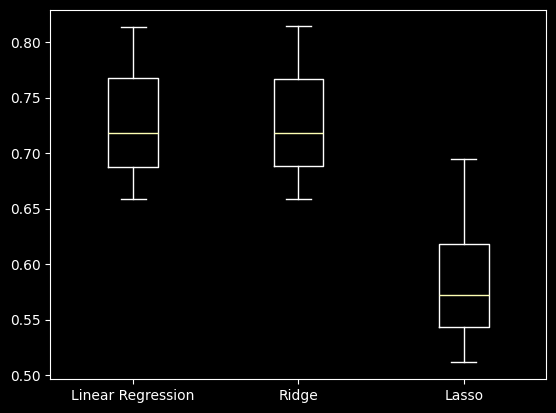

Model: Linear Regression---Model RMSE: 0.1145820777440286
Model: Ridge---Model RMSE: 0.11456932932496963
Model: Lasso---Model RMSE: 0.14567433676130612


In [89]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error


# define variables: X, y
X = dirty_music_df.drop('energy', axis=1).values
y = dirty_music_df['energy'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=1234)


# create a models dictionary instantiating LinearRegression, Ridge with `alpha=0.07`, and Lasso with `alpha=0.07`: models, Linear Regression, Ridge, Lasso
models = {'Linear Regression': LinearRegression(), 'Ridge': Ridge(alpha=0.07), 'Lasso': Lasso(alpha=0.07)}
# create empty results list: results
results =[]

# loop through `models.values()`: model
for model_r in models.values():
    # instantiate KFold with `n_splits=12`: kf
    kf = KFold(n_splits=12, shuffle=True, random_state=383)
	# perform cross_val_score with `model` `X_train_impSca`, `y_train_impSca`, and `cv=kf`: cv_score
    cv_score = cross_val_score(model_r, X_train, y_train,  cv=kf)
	# append `cv_score` to `results`
    results.append(cv_score)


# create boxplot of `results` and show plot
plt.boxplot(results, tick_labels=models.keys())
plt.show()


# loop through `models.items()`: name, model
for name, model in models.items():
    # fit `model`
    model.fit(X_train, y_train)
	# make predictions: y_pred
    y_pred = model.predict(X_test)
	# calculate root_mean_squared_error: model_rmse
    model_rmse = root_mean_squared_error(y_test, y_pred)
	# print `model_rmse` for each `name`
    print(f'Model: {name}---Model RMSE: {model_rmse}')

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---
- use `dirty_music_df` from last pre-exercise/exercise
- make values of the `popularity` column that are equal to or greater than the median `1` and less than the median `0`

In [87]:
pop_median = dirty_music_df['popularity'].median()
dirty_music_df['popularity'] = np.where(dirty_music_df['popularity'] >= pop_median, 1, 0)

#### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

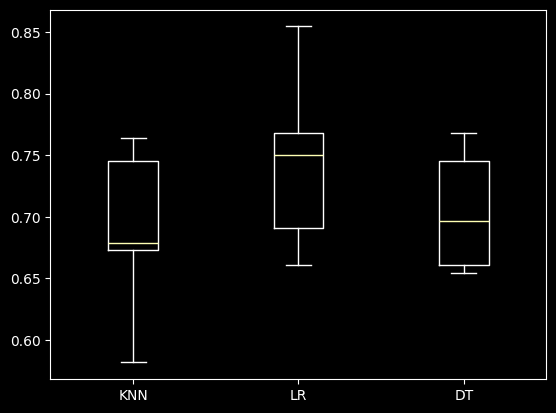

Tuned Logistic Regression Model---Best Parameters: {'logreg__C': np.float64(0.6443170731707318), 'logreg__max_iter': 333, 'logreg__solver': 'newton-cg'}
Tuned Logistic Regression Model---Accuracy: 0.7411764705882353


In [103]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# define variables: X, y
X = dirty_music_df.drop('popularity', axis=1).values
y = dirty_music_df['popularity'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=4321)


# instantiate StandardScaler: scaler
scaler =  StandardScaler()
# fit and transform `scaler` for X_train and X_test: X_train_scaled, X_test_scaled
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# create a models dictionary instantiating KNeighborsClassifier, Logistic Regression, and DecisionTreeClassifier: models, KNN, Logistic Regression, Decision Tree
models = {'KNN': KNeighborsClassifier(), 'LR': LogisticRegression(), 'DT': DecisionTreeClassifier()}
# create empty results list: results
results =[]


# loop through `models.values()`: model
for model_c in models.values():
    # instantiate KFold with `n_splits=13`: kf
    kf = KFold(n_splits=13, shuffle=True, random_state=737)
	# perform cross_val_score with `model` `X_train_impSca`, `y_train_impSca`, and `cv=kf`: cv_score
    cv_score = cross_val_score(model_c, X_train_scaled, y_train,  cv=kf)
	# append `cv_score` to `results`
    results.append(cv_score)


# create boxplot of `results` and show plot
plt.boxplot(results, tick_labels=models.keys())
plt.show()


# since `LogisticRegression()`seems to be the best model out-the-box, let's fine-tune it to make it better
# create Pipeline steps for `SimpleImputer()`, `StandarScaler()`, and `LogisticRegression()`: steps, imp_mean, scaler, logreg
steps = [('imp_mean', SimpleImputer()), ('scaler', StandardScaler()), ('logreg', LogisticRegression())]
# instantiate Pipeline: pipeline
pipeline = Pipeline(steps)
# create GridSearchCV parameters for `'logreg__solver'`with `["newton-cg", "saga", "lbfgs"]`, `'logreg__C'` with `np.linspace(0.001, 1.1, 42)`, and `'logreg__max_iter'` with `[333]`: params, logreg__solver, logreg__C, logreg__max_iter
params = {'logreg__solver': ["newton-cg", "saga", "lbfgs"], 'logreg__C': np.linspace(0.001, 1.1, 42), 'logreg__max_iter': [333]}
# instantiate GridSearchCV with `pipeline, param_grid=params`: tuning
tuning = GridSearchCV(pipeline, param_grid=params)

# fit `tuning` and make predictions: y_pred
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# print `.best_params_` and `.best_score_`
print(f'Tuned Logistic Regression Model---Best Parameters: {tuning.best_params_}\n'
      f'Tuned Logistic Regression Model---Accuracy: {tuning.score(X_test, y_test)}')